### Perceptron Algorithm

Consider the same separable dataset as for the previous lab, i.e., $X|Y=0$ is uniformly distribution on $[-2, -1] \times [-0.5, 0.5]$ and $X|Y=1$ is uniformly distribution on $[1, 2] \times [-0.5, 0.5]$.

**Comment:** The dataset can be generated using the code below.   

```python

import numpy as np

n = 10

def get_negative_samples(n):
    shift = np.array([-2, -0.5])
    x = np.random.uniform(size=(n, 2)) + shift
    return x

def get_positive_samples(n):
    shift = np.array([1, -0.5])
    x = np.random.uniform(size=(n, 2)) + shift
    return x

x_0 = get_negative_samples(n)
x_1 = get_positive_samples(n)
X = np.concatenate([x_0, x_1])
y = np.concatenate([-np.ones(len(x_0)), np.ones(len(x_1))])

```

**Task 1**: Implement SGD algortihm to solve $\ell_2$-regularized empirical risk minimization (ERM)
problem

\begin{align*}
    \min_{w \in \mathbb{R}^d} \frac1n\sum_{i=1}^n \left(\max\{1 - y_i \left< w, x_i \right>, 0\}\right) + \frac{\lambda}{2}\|w\|^2
\end{align*}

for this dataset.

- Plot the evolution of empirical loss, percentage of correctly classified examples and the norm of the weight vector for each iteration of the algorithm.
- Also, plot the final decision boundary of the classifier. 
- Pick the step size $\eta$ and the regularization parameter $\lambda$ by hand such that your algorithm converges.


In [1]:
import numpy as np

class SGD:
    def __init__(self, X, y, lr=0.01, lam=0., max_iter=1000, eps=1e-8):
        self.X = X
        self.y = y
        self.lr = lr
        self.lam = lam
        self.max_iter = max_iter
        self.eps = eps
        # initialize weights as zeros
        self.reset_params()

    def reset_params(self):
        self.w = np.zeros(self.X.shape[1])
        self.losses = []
        self.scores = []

    def fit(self, random_seed=123):
        rng = np.random.default_rng(random_seed)
        X, y = self.X, self.y
        for i in range(self.max_iter):
            self.losses.append(self.empirical_risk())
            self.scores.append(self.score(X, y))
            i = rng.integers(0, len(X))
            self.update(X, y, i)
            if self.losses[-1] < self.eps:
                self.losses.append(self.empirical_risk())
                self.scores.append(self.score(X, y))
                break


    def update(self, X, y, i):
        x_i, y_i = X[i], y[i]
        if y_i * np.dot(self.w, x_i) < 1:
            self.w += self.lr * y_i * x_i
        self.w -= self.lr * self.lam * self.w

    def empirical_risk(self):
        X, y = self.X, self.y
        return np.mean(np.maximum(0, 1 - y * (np.dot(X, self.w))))

    def score(self, X, y):
        return np.mean(y * np.dot(X, self.w) >= 1)

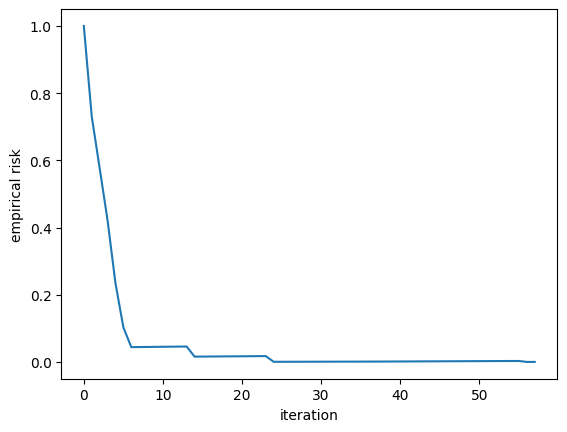

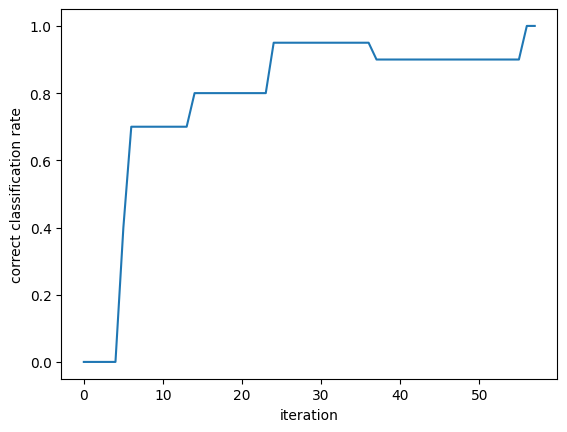

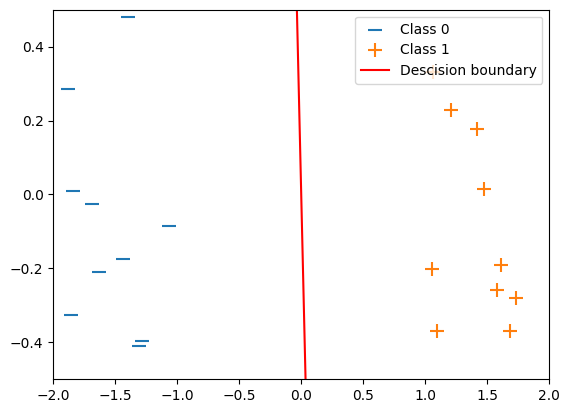

In [2]:
# test
import matplotlib.pyplot as plt

n = 10

def get_negative_samples(n):
    shift = np.array([-2, -0.5])
    x = np.random.uniform(size=(n, 2)) + shift
    return x

def get_positive_samples(n):
    shift = np.array([1, -0.5])
    x = np.random.uniform(size=(n, 2)) + shift
    return x

x_0 = get_negative_samples(n)
x_1 = get_positive_samples(n)
X = np.concatenate([x_0, x_1])
y = np.concatenate([-np.ones(len(x_0)), np.ones(len(x_1))])

sgd = SGD(X, y, lr=0.1, lam=0.01, max_iter=1000)
sgd.fit()

# plot loss
plt.plot(sgd.losses)
plt.xlabel('iteration')
plt.ylabel('empirical risk')  
plt.show()

# plot correct classification rate
plt.plot(sgd.scores)
plt.xlabel('iteration')
plt.ylabel('correct classification rate')
plt.show()

# plot decision boundary
plt.scatter(x_0[:, 0], x_0[:, 1], s=100, marker='_', label="Class 0")
plt.scatter(x_1[:, 0], x_1[:, 1], s=100, marker='+', label="Class 1")
plt.plot([-2, 2], [2 * sgd.w[0] / sgd.w[1], -2* sgd.w[0] / sgd.w[1]],
          'r-', label="Descision boundary")
plt.legend()
plt.ylim([-1/2, 1/2])
plt.xlim([-2, 2])
plt.show()

**Task 2**: Compare that your implmentation of SGD algorithm with the implementation of the Perceptron algorithm from the last lab. How do you choose the step size and the regularization parameter to recover the Perceptron algorithm?

**Comment**: Use `np.random.default_rng(12345)` to make sure that your results are reproducible. If this is the first time you are using seed, please read [the documentation](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) of the function.

**Note**: If you used the implementation where you sample only from misclassified examples, you can either adjust your SGD implementation to do the same procedure or adjust your original perceptron implementation to obtain the same results. 

In [3]:
random_seed = 123

# SGD with step size 1 and no regularization
sgd = SGD(X, y, lr=1., lam=0., max_iter=1000, eps=1e-16)
sgd.fit(random_seed)

# Perceptron from the previous lab for comparison
w = np.zeros(2)

rng = np.random.default_rng(random_seed)
# stopping criteria is when we predict all points correctly
while (X.dot(w) * y < 1).any():
    # pick a random point
    i = rng.integers(0, len(X))
    # update the weight vector
    if y[i] * np.dot(w, X[i]) < 1:
        w += y[i] * X[i]

# assert that the weights are the same
if np.allclose(w, sgd.w):
    print('Weights are the same')
else:
    print('Weights are different')


Weights are the same


**Task 3**: Consider the separable dataset, where $X|Y=0$ is uniformly distribution on $[-1-a, -a] \times [-0.5, 0.5]$ and $X|Y=1$ is uniformly distribution on $[a, 1+a] \times [-0.5, 0.5]$ for given $a \in (0, 1]$. Choose different values of $a$ and plot the norm of the solution $\|w\|$ versus $a$. Use the Perceptron algorithm to solve the problem. What do you observe? How do you explain this?

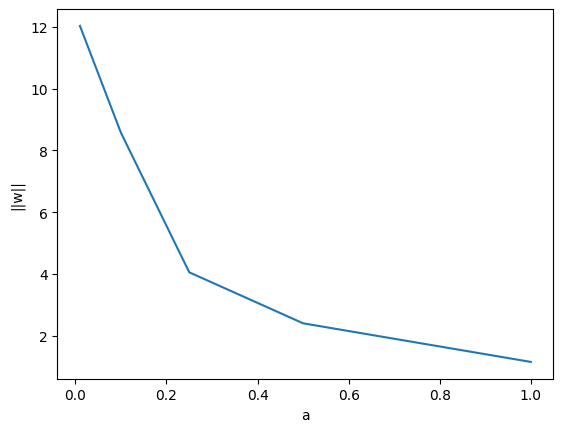

In [4]:
n = 100
a_s = [0.01, 0.1, 0.25, 0.5, 1]

def get_negative_samples(n, a):
    shift = np.array([-(1+a), -0.5])
    x = np.random.uniform(size=(n, 2)) + shift
    return x

def get_positive_samples(n, a):
    shift = np.array([a, -0.5])
    x = np.random.uniform(size=(n, 2)) + shift
    return x

norms = []
for a in a_s:
    x_0 = get_negative_samples(n, a)
    x_1 = get_positive_samples(n, a)
    X = np.concatenate([x_0, x_1])
    y = np.concatenate([-np.ones(len(x_0)), np.ones(len(x_1))])

    sgd = SGD(X, y, lr=1., lam=0., max_iter=1000)
    sgd.fit()
    norms.append(np.linalg.norm(sgd.w))

plt.plot(a_s, norms)
plt.xlabel('a')
plt.ylabel('||w||')
plt.show()

# Smaller the `a`, larger the norm of the weight vector
# Note that smaller `a` means that the two classes are closer to each other,
# so it is harder to separate them, i.e., margin is smaller.

**Task 4**: Consider the dataset from the prior task with $a = 0.1$. Implement leave-one-out algorithm to estimate the generalization error of the classifier. Plot your estime versus the number of data points $n$.

n = 10...


100%|██████████| 10/10 [00:00<00:00, 62.13it/s]


n = 20...


 15%|█▌        | 3/20 [00:00<00:00, 26.48it/s]

100%|██████████| 20/20 [00:00<00:00, 26.86it/s]


n = 30...


100%|██████████| 30/30 [00:01<00:00, 22.77it/s]


n = 40...


100%|██████████| 40/40 [00:01<00:00, 25.67it/s]


n = 50...


100%|██████████| 50/50 [00:02<00:00, 22.39it/s]


n = 60...


100%|██████████| 60/60 [00:02<00:00, 21.18it/s]


n = 70...


100%|██████████| 70/70 [00:03<00:00, 19.40it/s]


n = 80...


100%|██████████| 80/80 [00:04<00:00, 18.97it/s]


n = 90...


100%|██████████| 90/90 [00:04<00:00, 19.55it/s]


n = 100...


100%|██████████| 100/100 [00:05<00:00, 19.45it/s]


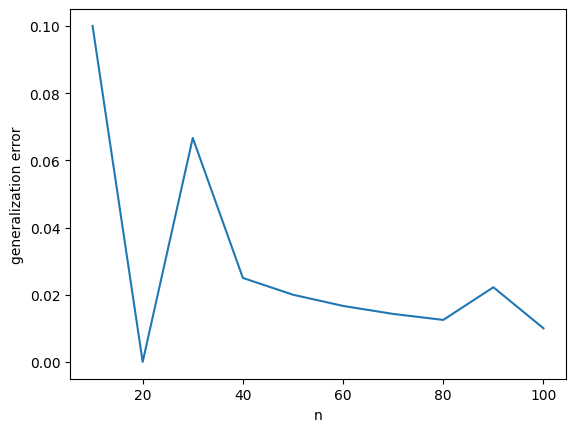

In [5]:
from tqdm import tqdm

a = 0.1
n_s = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

gen_error_s = []
for n in n_s:
    print(f"n = {n}...")
    x_0 = get_negative_samples(n, a)
    x_1 = get_positive_samples(n, a)
    X = np.concatenate([x_0, x_1])
    y = np.concatenate([-np.ones(len(x_0)), np.ones(len(x_1))])
    leave_one_out = []
    for i in tqdm(range(n)):
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)
        sgd = SGD(X_train, y_train, lr=1., lam=0., max_iter=1000)
        sgd.fit()
        leave_one_out.append(sgd.score(X[i:i+1], y[i:i+1]))
    gen_error_s.append(1 - np.mean(leave_one_out))

# Plot the generalization error
plt.plot(n_s, gen_error_s)
plt.xlabel('n')
plt.ylabel('generalization error')
plt.show()


**Task 5**: Extend the above plot with the theoretical uppebound (60), where you replace the expected value with the upper bound on the diameter of the dataset and lower bound on the margin of dataset. Is the bound tight?

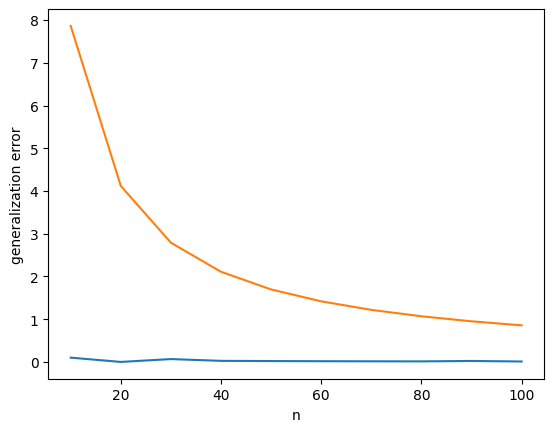

In [6]:
# lower bound on margin is 2a and upper bound on diameter is \sqrt{(1 + a)^2 + 0.5^2}
upper_bound = (2 + (1 + a)**2 + 0.5**2) / (2 * a)**2 / (np.array(n_s) + 1)

# Plot the generalization error
plt.plot(n_s, gen_error_s, label='Estimated')
plt.plot(n_s, upper_bound, label='Upper bound')
plt.xlabel('n')
plt.ylabel('generalization error')
plt.show()

# for small n, the upper bound is not tight (even vacuous since it is greater than 1)